# 神经网络(Neual Network)

In [42]:
import  tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

In [43]:
(train_images, train_labels) , (test_images , test_labels) = tf.keras.datasets.mnist.load_data()

这是数字: 5


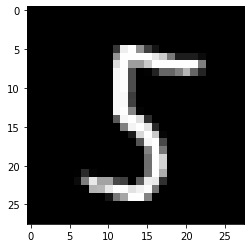

In [44]:
pick_one = np.random.randint( 0 , 5000) 
plt.imshow(train_images[pick_one] , "gray")
print("这是数字:" , train_labels[pick_one])

In [45]:

train_images = train_images[0:5000 , : , :] 
train_labels = train_labels[0:5000]
train_images.shape
train_images = train_images.reshape(5000, 28* 28)
print(train_images.shape)
print(train_labels.shape)


(5000, 784)
(5000,)


准备数据,为每个样本数据添加一个偏置层 $\theta_0$


In [46]:
X = np.insert(train_images , 0 ,values = np.ones(train_images.shape[0]) , axis = 1)
X.shape

(5000, 785)

向量化标签

In [47]:
y_matrix = [] 
for k in range (10):
    y_matrix.append((train_labels == k).astype(int))
y = np.array(y_matrix)
y

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

激活函数:sigmoid 
$$
    \sigma (z) = \frac{1}{1+e^(-z)}
$$

In [48]:
def sigmoid(z):
    return 1 / (1 )

损失函数:
$
    J(\theta) = \frac{1}{m}\sum_{i = 1}^m[-y^{i}log(h_{\theta}(x^{(i)})) - (1 - y^{(i)})log( 1 - h_{\theta}(x^{(i)}))]
$

In [49]:
def cost (theta, X , y):
    return np.mean(-y * np.log(sigmoid(X @ theta)) - ( 1 - y) * np.log(1- sigmoid(X @ theta))) 

In [51]:
def regularized_cost(theta, X ,y , lamda = 1):
    theta_j1_to_n = theta[1:]
    regulaized_term = lamda / (2 * len(X)) * np.sum( theta_j1_to_n **2)
    return cost(theta , X , y) + regulaized_term

梯度 
$$
\frac{\partial J}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}((h_{\theta}(x^{(i)})- y^{(i)})x_j^{(i)} )
$$

In [52]:
def gradient(theta , X , y) : 
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)    

In [53]:
def regularized_gradient(theta, X , y , lamda = 1) : 
    theta_j1_to_n = theta[1:]
    regularized_theta = (1/len(X)) * theta_j1_to_n 
    regularized_term = np.concatenate(np.array([0] , regularized_theta))
    return gradient(theta, X , y) + regularized_term 